In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
temp_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LAB 2/CarData.csv')
temp_dataset[temp_dataset['KM'] == '??']

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
6,6,16900,27.0,??,Diesel,????,NaN,0,2000,3,1245
64,64,17950,27.0,??,Petrol,97,1.0,0,1400,5,1110
91,91,22250,20.0,??,Diesel,90,1.0,0,2000,3,1260
112,112,24950,8.0,??,Diesel,116,1.0,0,2000,5,1320
125,125,21750,16.0,??,Petrol,110,1.0,0,1600,5,1130
131,131,15950,20.0,??,Petrol,97,1.0,0,1400,5,1110
398,398,10500,55.0,??,Petrol,110,1.0,0,1600,4,1035
491,491,10750,54.0,??,Petrol,110,1.0,0,1600,5,1075
1049,1049,6750,77.0,??,Diesel,72,1.0,0,2000,4,1100
1120,1120,7350,72.0,??,Petrol,86,1.0,0,1300,3,1015


Observation

1. As we can see few dataframe contains inappropriate data which needs to be handled while preprocessing.
2. The best way is to replace all such values by NaN.
3. use na_values attritube in pd.read()



In [13]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LAB 2/CarData.csv', na_values = ['??', '????']) 
print("Number of rows and columns:", dataset.shape)
dataset.head()

Number of rows and columns: (1436, 11)


,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
2,2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165
3,3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170


In [14]:
dataset.columns.tolist()

['Unnamed: 0',
 'Price',
 'Age',
 'KM',
 'FuelType',
 'HP',
 'MetColor',
 'Automatic',
 'CC',
 'Doors',
 'Weight']

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1436 non-null   int64  
 1   Price       1436 non-null   int64  
 2   Age         1336 non-null   float64
 3   KM          1421 non-null   float64
 4   FuelType    1336 non-null   object 
 5   HP          1430 non-null   float64
 6   MetColor    1286 non-null   float64
 7   Automatic   1436 non-null   int64  
 8   CC          1436 non-null   int64  
 9   Doors       1436 non-null   object 
 10  Weight      1436 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 123.5+ KB


In [16]:
dataset.drop('Unnamed: 0',axis = 1, inplace = True)


In [17]:
dataset.isnull().sum()

Price          0
Age          100
KM            15
FuelType     100
HP             6
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

In [18]:
dataset['Doors'].unique()


array(['three', '3', '5', '4', 'four', 'five', '2'], dtype=object)

In [19]:
dataset['Doors'] = dataset['Doors'].map({'three':3, '3':3, '5':5, '4':4, '2':2, 'four':4, 'five':5})
dataset['Doors'].unique()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1336 non-null   float64
 2   KM         1421 non-null   float64
 3   FuelType   1336 non-null   object 
 4   HP         1430 non-null   float64
 5   MetColor   1286 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   int64  
 9   Weight     1436 non-null   int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 112.3+ KB


Handling null values

In [20]:
# droping rows with all null values
dataset.dropna(how = "all", inplace = True)
print("Number of rows and columns:", dataset.shape)

Number of rows and columns: (1436, 10)


In [21]:
dataset.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1336.000000,1421.000000,1430.000000,1286.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.672156,68647.239972,101.478322,0.674961,0.055710,1566.827994,4.033426,1072.45961
std,3626.964585,18.589804,37333.023589,14.768255,0.468572,0.229441,187.182436,0.952677,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.00000
25%,8450.000000,43.000000,43210.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.00000
50%,9900.000000,60.000000,63634.000000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.00000
75%,11950.000000,70.000000,87000.000000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.00000


In [22]:
dataset.describe(include = 'object')

,FuelType
count,1336
unique,3
top,Petrol
freq,1177


In [23]:
print("Unique Fuel Type values:",dataset['FuelType'].unique())
print("Count of each type:")
dataset['FuelType'].value_counts()

Unique Fuel Type values: ['Diesel' nan 'Petrol' 'CNG']
Count of each type:


Petrol    1177
Diesel     144
CNG         15
Name: FuelType, dtype: int64

In [24]:
dataset['FuelType'].fillna('Diesel', inplace = True)
print("Type of fuels:",dataset['FuelType'].unique())
print("Count of each type:")
dataset['FuelType'].value_counts()

Type of fuels: ['Diesel' 'Petrol' 'CNG']
Count of each type:


Petrol    1177
Diesel     244
CNG         15
Name: FuelType, dtype: int64

In [25]:
le = LabelEncoder()
dataset['FuelType'] = le.fit_transform(dataset['FuelType'])
print("Unique Fuel Type values:",dataset['FuelType'].unique())
dataset.head(10)

Unique Fuel Type values: [1 2 0]


,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986.0,1,90.0,1.0,0,2000,3,1165
1,13750,23.0,72937.0,1,90.0,1.0,0,2000,3,1165
2,13950,24.0,41711.0,1,90.0,NaN,0,2000,3,1165
3,14950,26.0,48000.0,1,90.0,0.0,0,2000,3,1165
4,13750,30.0,38500.0,1,90.0,0.0,0,2000,3,1170
5,12950,32.0,61000.0,1,90.0,0.0,0,2000,3,1170
6,16900,27.0,NaN,1,NaN,NaN,0,2000,3,1245
7,18600,30.0,75889.0,1,90.0,1.0,0,2000,3,1245
8,21500,27.0,19700.0,2,192.0,0.0,0,1800,3,1185
9,12950,23.0,71138.0,1,NaN,NaN,0,1900,3,1105


Replacing all NaN values with respective mean using imputer

In [26]:
dataset = dataset.reindex(columns = ['Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors', 
                                     'Weight', 'Price'])
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

print("X:\n",X)
print("\n\nY:\n",Y)

imputer = SimpleImputer(missing_values = np.nan, strategy = "mean")

X:
 [[2.3000e+01 4.6986e+04 1.0000e+00 ... 2.0000e+03 3.0000e+00 1.1650e+03]
 [2.3000e+01 7.2937e+04 1.0000e+00 ... 2.0000e+03 3.0000e+00 1.1650e+03]
 [2.4000e+01 4.1711e+04 1.0000e+00 ... 2.0000e+03 3.0000e+00 1.1650e+03]
 ...
 [       nan 1.7016e+04 2.0000e+00 ... 1.3000e+03 3.0000e+00 1.0150e+03]
 [7.0000e+01        nan 1.0000e+00 ... 1.3000e+03 3.0000e+00 1.0150e+03]
 [7.6000e+01 1.0000e+00 2.0000e+00 ... 1.6000e+03 5.0000e+00 1.1140e+03]]


Y:
 [13500 13750 13950 ...  8500  7250  6950]


In [27]:
# Fitting the data, function learns the stats 
imputer = imputer.fit(X[:,:]) 
  
# fit_transform() will execute those stats on the input ie. X[:, 1:3] 
X[:,:] = imputer.transform(X[:,:]) 
  
# filling the missing value with mean 
print("\n\nNew Input with Mean Value for NaN : \n\n", X) 



New Input with Mean Value for NaN : 

 [[2.30000000e+01 4.69860000e+04 1.00000000e+00 ... 2.00000000e+03
  3.00000000e+00 1.16500000e+03]
 [2.30000000e+01 7.29370000e+04 1.00000000e+00 ... 2.00000000e+03
  3.00000000e+00 1.16500000e+03]
 [2.40000000e+01 4.17110000e+04 1.00000000e+00 ... 2.00000000e+03
  3.00000000e+00 1.16500000e+03]
 ...
 [5.56721557e+01 1.70160000e+04 2.00000000e+00 ... 1.30000000e+03
  3.00000000e+00 1.01500000e+03]
 [7.00000000e+01 6.86472400e+04 1.00000000e+00 ... 1.30000000e+03
  3.00000000e+00 1.01500000e+03]
 [7.60000000e+01 1.00000000e+00 2.00000000e+00 ... 1.60000000e+03
  5.00000000e+00 1.11400000e+03]]


Feature selection based on correlation

In [30]:
dataset_new = dataset.iloc[:,0:8]
dataset_new.head()



,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors
0,23.0,46986.0,1,90.0,1.0,0,2000,3
1,23.0,72937.0,1,90.0,1.0,0,2000,3
2,24.0,41711.0,1,90.0,NaN,0,2000,3
3,26.0,48000.0,1,90.0,0.0,0,2000,3
4,30.0,38500.0,1,90.0,0.0,0,2000,3


In [31]:
corr = dataset_new.corr()
corr.head(8)


,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors
Age,1.000000,0.512735,0.057137,-0.157904,-0.099659,0.032573,-0.120706,-0.157027
KM,0.512735,1.000000,-0.335027,-0.335285,-0.093825,-0.081248,0.299993,-0.036191
FuelType,0.057137,-0.335027,1.000000,0.358597,-0.006752,0.059933,-0.520432,-0.011948
HP,-0.157904,-0.335285,0.358597,1.000000,0.064749,0.013755,0.053758,0.097162
MetColor,-0.099659,-0.093825,-0.006752,0.064749,1.000000,-0.013973,0.029189,0.086203
Automatic,0.032573,-0.081248,0.059933,0.013755,-0.013973,1.000000,-0.069321,-0.027654
CC,-0.120706,0.299993,-0.520432,0.053758,0.029189,-0.069321,1.000000,0.126768
Doors,-0.157027,-0.036191,-0.011948,0.097162,0.086203,-0.027654,0.126768,1.000000


No two feature has high correlation (>=0.9) with other. So, we can't remove any attribute

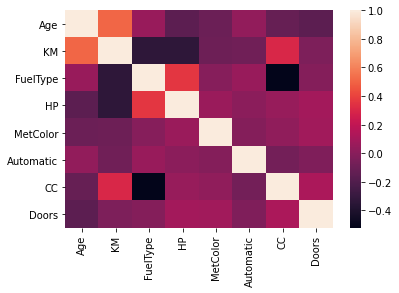

In [32]:
sns.heatmap(corr)